<a href="https://colab.research.google.com/github/gueets/Projetos-da-faculdade/blob/main/Projeto_Bases_Computacionais_da_Ci%C3%AAncia_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Projeto 02 - Bases Computacionas da Ciência -> Videogames: análise de popularidade e vendas de 1976 à 2017.

**Alunos:**
* Ana Beatriz Araújo
* Graziane de Oliveira
* Guilherme de Carvalho

***Disciplina:*** Bases Computacionais da Ciência

*Observação:  Este projeto é a segunda parte do postado anteriormente. Neste código o o grupo aplicou os conhecimentos de análise de dados em conjuto com lógica de programação que aprendeu durante o quadrismestre na disciplina de Bases Computacionais da Ciência.*


## **Importanções necessárias**

In [ ]:
# Importações necessárias:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Banco de dados "Video Game Sales and Ratings"
df = pd.read_csv("https://raw.githubusercontent.com/guilhermechicarolli/VideoGames/main/Data%20Base.csv", sep= ";")

# Remoção dos jogos com nomes duplicados
df = df.drop_duplicates(subset=['Name'], keep='first')   

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating;,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Action Force,2600,1982,Action,CPG Products,0.50,0.03,0.0,0.01,0.54,NaN,NaN,NaN,NaN,;,NaN,NaN,NaN
1,Adventure,2600,1980,Adventure,Atari,1.21,0.08,0.0,0.01,1.30,NaN,NaN,NaN,NaN,;,NaN,NaN,NaN
2,Adventures of Tron,2600,1981,Action,Mattel Interactive,0.63,0.03,0.0,0.01,0.67,NaN,NaN,NaN,NaN,;,NaN,NaN,NaN
3,Air Raid,2600,1981,Action,Men-A-Vision,0.72,0.04,0.0,0.01,0.77,NaN,NaN,NaN,NaN,;,NaN,NaN,NaN
4,Airlock,2600,1981,Action,Data Age,0.36,0.02,0.0,0.00,0.39,NaN,NaN,NaN,NaN,;,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17207,Ryse: Son of Rome,XOne,2013,Action,Microsoft Game Studios,0.83,0.43,0.0,0.13,1.39,60.0,77.0,6.1,1417.0,M;,NaN,NaN,NaN
17211,ScreamRide,XOne,2015,Simulation,Microsoft Game Studios,0.00,0.01,0.0,0.00,0.01,71.0,63.0,4.8,228.0,E10+;,NaN,NaN,NaN
17212,Shape Up,XOne,2014,Misc,Ubisoft,0.08,0.09,0.0,0.01,0.18,58.0,6.0,8.0,29.0,E;,NaN,NaN,NaN
17223,State of Decay,XOne,2015,Strategy,Microsoft Game Studios,0.15,0.05,0.0,0.02,0.22,NaN,NaN,NaN,NaN,;,NaN,NaN,NaN


## **Apresentação de gráficos do jogo escolhido**

Insira o nome de um jogo, informações sobre ele serão mostradas (por favor, lembre-se de incluir letras maiúsculas devidamente): Luigi
Existem 9 jogos que contém o nome "Luigi", são eles: 
-> Luigis Mansion: Dark Moon
-> Mario & Luigi: Dream Team
-> Mario & Luigi: Paper Jam
-> Mario & Luigi: Paper Jam & Mario Kart 7 Double Pack
-> Mario & Luigi: Bowsers Inside Story
-> Mario & Luigi: Partners in Time
-> Mario & Luigi: Superstar Saga
-> Luigis Mansion
-> New Super Luigi U
--------------------------------------------
Qual jogo dentre esses deve ser informado? Luigis Mansion


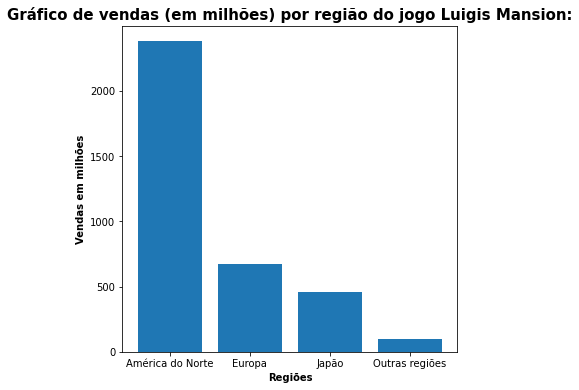

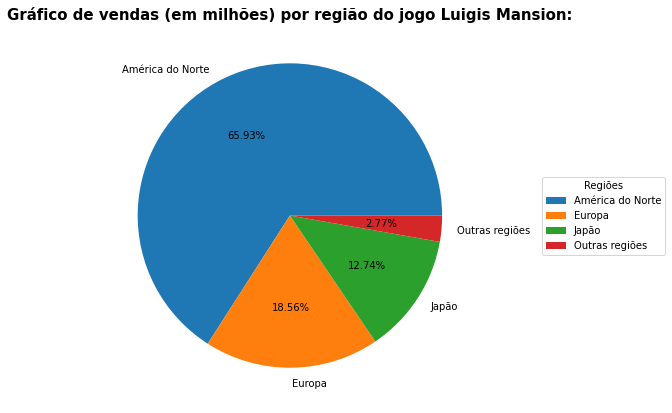

In [ ]:
# O programa pede ao usuário que insira o nome de um jogo, em seguida exibe
# informações sobre as vendas do jogo no formato de gráficos.

# Busca do nome inserido pelo usuário
nome = str(input('Insira o nome de um jogo, informações sobre ele serão mostradas (por favor, lembre-se de incluir letras maiúsculas devidamente): '))
df1 = df[df['Name'].str.contains(nome)]

# Verificação se existe mais de um jogo com o mesmo nome inserido pelo usuário
lista_nome = list(df1['Name'])

if len(lista_nome) > 1:
  print(f'Existem {len(lista_nome)} jogos que contém o nome "{nome}", são eles: ')

  for i in lista_nome:        # Loop for para printar os jogos com que contém o nome inserido pelo usuário
    print(f'-> {i}')

  print('--------------------------------------------')
  nome = str(input('Qual jogo dentre esses deve ser informado? '))
  df1 = df[df['Name'] == nome]
else:
  df1 = df[df['Name'] == nome]

# Guardando os valores das vendas por região do jogo inserido pelo usuário
vendas = [float(df1['NA_Sales'])*1000, float(df1['EU_Sales'])*1000, float(df1['JP_Sales'])*1000, float(df1['Other_Sales'])*1000]
regioes = 'América do Norte', 'Europa', 'Japão', 'Outras regiões'

# Plot do gráfico de barras das vendas
fig, ax = plt.subplots(figsize=(6, 6))

plt.bar(regioes, vendas)
plt.xticks(regioes)
plt.xlabel('Regiões',  weight='bold')
plt.ylabel('Vendas em milhões',  weight='bold')
ax.set_title(f'Gráfico de vendas (em milhões) por região do jogo {nome}:', size = 15, weight='bold') 

plt.show()

# Plot do gráfico de pizza das vendas
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect='equal'))

ax.pie(vendas, labels = regioes, autopct="%1.2f%%")                                                                      
ax.legend(regioes, title='Regiões', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))                         
ax.set_title(f'Gráfico de vendas (em milhões) por região do jogo {nome}:', size = 15, weight='bold')        

plt.show()

## **Indicação de jogo pelo programa**

In [ ]:
# O programa indica um jogo para o usuário jogar, baseado nas preferências do usuário
# de gênero, plataforma e ano

df2 = df.sort_values(by=['Global_Sales', 'Critic_Score'], ascending=False)

# Inserção dos valores pelo usuário e guardando os mesmos

print('Este programa indica um jogo para você jogar baseado nas suas preferências de gênero, plataforma e ano.')
genero = str(input('Primeiro, digite qual gênero de jogos você quer jogar? (Insira um dos seguintes gêneros fora dos parênteses: \nAction (ação), Adventure (aventura), Fighting (luta), Platform (plataforma), Puzzle, Racing (corrida), \nRole-Playing (RPG), Shooter (tiro), Simulation (simulação), Sports (esportes), Strategy (estratégia) ou Misc): '))
print('----------------------------------------------------------')
plat = str(input('Em qual plataforma você pretende jogar? \n(3DS (Nintendo 3DS), GBO (Game Boy), N64 (Nintendo 64), NES (Super Nintendo), PC (Computador), \nPS (Playstation 1),PS2 (Playstation 2), PS3 (Playstation 3), PS4 (Playstation 4), PSP (Playstation Portátil), \nWii (Nintendo Wii), WiiU (Nintendo Wii U), X (Xbox), X360 (Xbox 360) ou XOne (Xbox One): '))
print('----------------------------------------------------------')
ano = str(input("Você tem preferência por jogos antigos (<2010), novos (>2010) ou não há preferência?\n(Insira: 'novos', 'antigos' ou 'não há'): "))

# Listas com todos os gêneros e plataformas
total_generos = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
total_plat = ['3DS', 'GBO', 'N64', 'NES', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'WiiU', 'X', 'X360', 'XOne']
total_ano = ['novos', 'antigos', 'não há']

if genero in total_generos: 
  df2 = df2[df2.Genre==genero]
  
  if plat in total_plat:
    df2 = df2[df2.Platform==plat]

    if ano in total_ano:
      if ano == 'antigos':
        df3 = df2[df2.Year_of_Release.isin( ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'])]
                
      elif ano == 'novos':
        df3 = df2[df2.Year_of_Release.isin(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])]

  indicacao = df2.head(2)

  Nome_indic = indicacao[['Name']]
  Nome_indic = indicacao['Name'].tolist()

  print('----------------------------------------------------------\n')
  print('\033[1m' + f'Indicamos para você o seguinte jogo: {Nome_indic[0]}, o jogo mais vendido e bem avaliado das categorias e que atende a suas preferências!')
  

Este programa indica um jogo para você jogar baseado nas suas preferências de gênero, plataforma e ano.
Primeiro, digite qual gênero de jogos você quer jogar? (Insira um dos seguintes gêneros fora dos parênteses: 
Action (ação), Adventure (aventura), Fighting (luta), Platform (plataforma), Puzzle, Racing (corrida), 
Role-Playing (RPG), Shooter (tiro), Simulation (simulação), Sports (esportes), Strategy (estratégia) ou Misc): Adventure
----------------------------------------------------------
Em qual plataforma você pretende jogar? 
(3DS (Nintendo 3DS), GBO (Game Boy), N64 (Nintendo 64), NES (Super Nintendo), PC (Computador), 
PS (Playstation 1),PS2 (Playstation 2), PS3 (Playstation 3), PS4 (Playstation 4), PSP (Playstation Portátil), 
Wii (Nintendo Wii), WiiU (Nintendo Wii U), X (Xbox), X360 (Xbox 360) ou XOne (Xbox One): PC
----------------------------------------------------------
Você tem preferência por jogos antigos (<2010), novos (>2010) ou não há preferência?
(Insira: 'novos', 

## **Apresentação de gráficos da plataforma escolhida**


Qual plataforma você deseja analisar? (Insira uma das seguintes plataformas fora dos parênteses: 
(3DS (Nintendo 3DS), GBO (Game Boy), N64 (Nintendo 64), NES (Super Nintendo), PC (Computador), 
PS (Playstation 1),PS2 (Playstation 2), PS3 (Playstation 3), PS4 (Playstation 4), PSP (Playstation Portátil), 
Wii (Nintendo Wii), WiiU (Nintendo Wii U), X (Xbox), X360 (Xbox 360) ou XOne (Xbox One): PSP


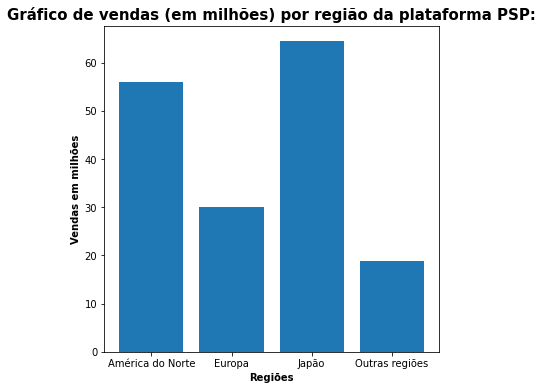

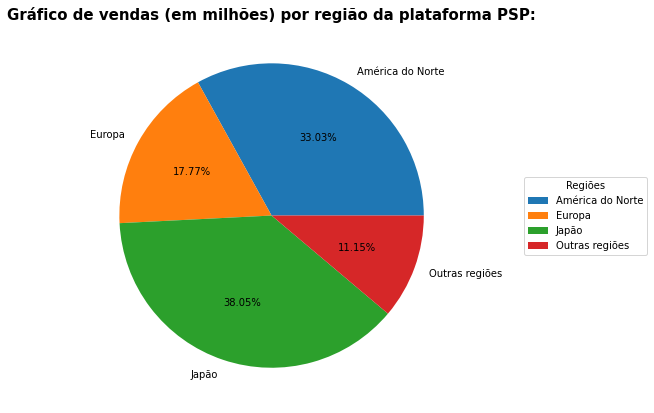

In [ ]:
# Filtragem tabela 
plats = df.filter(items = ['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# Busca da plataforma inserida pelo usuário
plataforma = str(input('Qual plataforma você deseja analisar? (Insira uma das seguintes plataformas fora dos parênteses: \n(3DS (Nintendo 3DS), GBO (Game Boy), N64 (Nintendo 64), NES (Super Nintendo), PC (Computador), \nPS (Playstation 1),PS2 (Playstation 2), PS3 (Playstation 3), PS4 (Playstation 4), PSP (Playstation Portátil), \nWii (Nintendo Wii), WiiU (Nintendo Wii U), X (Xbox), X360 (Xbox 360) ou XOne (Xbox One): '))

# Agrupamento pela soma dos valores de vendas das plataformas
plats1 = plats[plats['Platform'] == plataforma].sum()


# Guardando os valores por região da plataforma escolhida
vendas = [plats1['NA_Sales'], plats1['EU_Sales'], plats1['JP_Sales'], plats1['Other_Sales']]
regioes = 'América do Norte', 'Europa', 'Japão', 'Outras regiões'


# Plot do gráfico de barras das vendas
fig, ax = plt.subplots(figsize=(6, 6))

plt.bar(regioes, vendas)
plt.xticks(regioes)
plt.xlabel('Regiões',  weight='bold')
plt.ylabel('Vendas em milhões',  weight='bold')
ax.set_title(f'Gráfico de vendas (em milhões) por região da plataforma {plataforma}:', size = 15, weight='bold') 

plt.show()

# Plot do gráfico de pizza das vendas
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect='equal'))

ax.pie(vendas, labels = regioes, autopct="%1.2f%%")                                                                      
ax.legend(regioes, title='Regiões', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))                         
ax.set_title(f'Gráfico de vendas (em milhões) por região da plataforma {plataforma}:', size = 15, weight='bold')        

plt.show()


## **Apresentação de gráficos do gênero escolhido**

Qual gênero de jogos você quer analisar? (Insira um dos seguintes gêneros fora dos parênteses: 
Action (ação), Adventure (aventura), Fighting (luta), Platform (plataforma), Puzzle, Racing (corrida), 
Role-Playing (RPG), Shooter (tiro), Simulation (simulação), Sports (esportes), Strategy (estratégia) ou Misc): Strategy


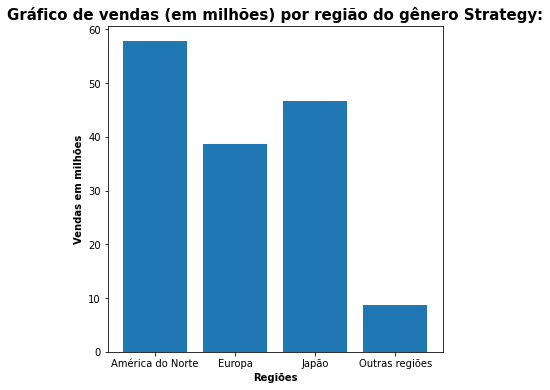

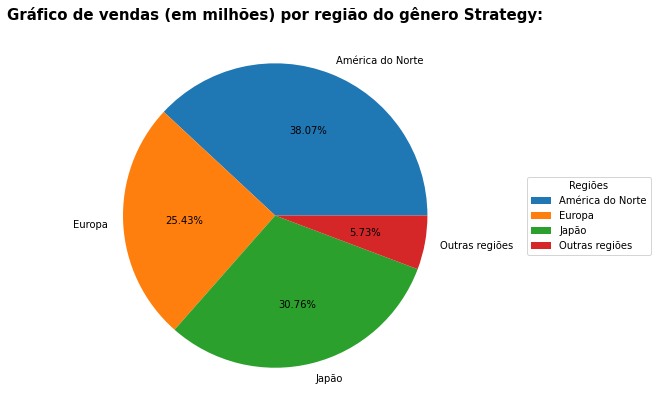

In [ ]:
# Filtragem tabela
gens = df.filter(items = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])


# Busca do gênero inserido pelo usuário
genero = str(input('Qual gênero de jogos você quer analisar? (Insira um dos seguintes gêneros fora dos parênteses: \nAction (ação), Adventure (aventura), Fighting (luta), Platform (plataforma), Puzzle, Racing (corrida), \nRole-Playing (RPG), Shooter (tiro), Simulation (simulação), Sports (esportes), Strategy (estratégia) ou Misc): '))

# Agrupamento pela soma dos valores de vendas dos gêneros
gens1 = gens[gens['Genre'] == genero].sum()


# Guardando os valores por região do gênero inserido pelo usuário
vendas = [gens1['NA_Sales'], gens1['EU_Sales'], gens1['JP_Sales'], gens1['Other_Sales']]
regioes = 'América do Norte', 'Europa', 'Japão', 'Outras regiões'


# Plot do gráfico de barras das vendas
fig, ax = plt.subplots(figsize=(6, 6))

plt.bar(regioes, vendas)
plt.xticks(regioes)
plt.xlabel('Regiões',  weight='bold')
plt.ylabel('Vendas em milhões',  weight='bold')
ax.set_title(f'Gráfico de vendas (em milhões) por região do gênero {genero}:', size = 15, weight='bold') 

plt.show()

# Plot do gráfico de pizza das vendas
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect='equal'))

ax.pie(vendas, labels = regioes, autopct="%1.2f%%")                                                                      
ax.legend(regioes, title='Regiões', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))                         
ax.set_title(f'Gráfico de vendas (em milhões) por região do gênero {genero}:', size = 15, weight='bold')        

plt.show()


## **Apresentação dos games mais vendidos globalmente de acordo com a época escolhida**

In [ ]:
df1 = df[["Global_Sales","Name","Year_of_Release"]][df.Year_of_Release < 2010]
#dn.head(10)

sgl = df1.sort_values(by=['Global_Sales', 'Name'], ascending=[False, True])
fgl = sgl[['Name']]
listagl = list(fgl['Name'])
#df1.head(10)
sgl.head(10)

,Global_Sales,Name,Year_of_Release
14676,82.54,Wii Sports,2006
14037,35.57,Mario Kart Wii,2008
14677,32.78,Wii Sports Resort,2009
3015,31.37,Pokemon Red/Pokemon Blue,1996
3031,30.26,Tetris,1989
2075,29.81,New Super Mario Bros.,2006
14674,28.92,Wii Play,2006
14177,28.38,New Super Mario Bros. Wii,2009
4813,28.31,Duck Hunt,1984
2092,24.67,Nintendogs,2005


In [ ]:
df2 = df[["Global_Sales","Name","Year_of_Release"]][df.Year_of_Release >= 2010]
#dn.head(10)

sgl2 = df2.sort_values(by=['Global_Sales','Name'], ascending=[False, True])
fgl2 = sgl2[['Name']]
listagl2 = list(fgl2['Name'])
#df1.head(10)
sgl2.head(10)

,Global_Sales,Name,Year_of_Release
16270,21.86,Kinect Adventures!,2010
2235,15.14,Pokemon Black/Pokemon White,2010
503,14.92,Pokemon X/Pokemon Y,2013
412,13.04,Mario Kart 7,2011
498,11.95,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014
501,11.40,Pokemon Sun/Moon,2016
599,10.87,Super Mario 3D Land,2011
9815,10.70,Gran Turismo 5,2010
458,10.05,New Super Mario Bros. 2,2012
16200,9.90,Halo: Reach,2010


LISTA DE GAMES MAIS VENDIDOS ANTIGOS OU NOVOS!
● Qual deseja consultar? v para games velho  e n para novos
 ----- RESPOSTA: v
['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt', 'Nintendogs', 'Mario Kart DS', 'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus', 'Brain Age: Train Your Brain in Minutes a Day', 'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land', 'Pokemon Ruby/Pokemon Sapphire', 'Brain Age 2: More Training in Minutes a Day', 'Gran Turismo 3: A-Spec', 'Pok\\xc3\\xa9mon Yellow: Special Pikachu Edition', 'Super Smash Bros. Brawl', 'Animal Crossing: Wild World', 'Halo 3', 'Pokemon HeartGold/Pokemon SoulSilver', 'Gran Turismo 4', 'Super Mario Galaxy', 'Super Mario Land 2: 6 Golden Coins', 'Gran Turismo', 'Super Mario All-Stars', 'Pokemon FireRed/Pokemon LeafGreen', 'Super Mario 64', 'Mario Kart 64', 'Final Fantasy VII', 'Gran Turismo 2', 'Mario Party DS',

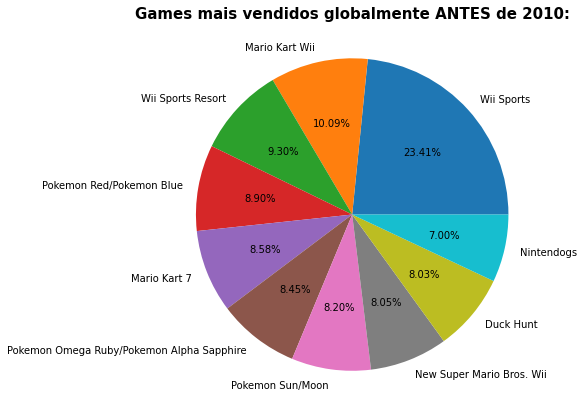

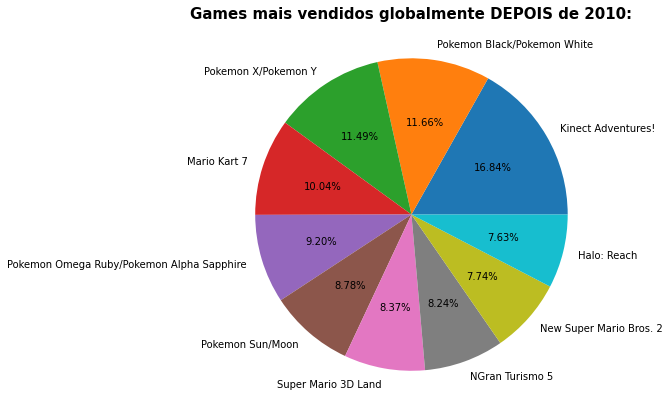

ENCERRANDO O PROGRAMA!


In [ ]:
resposta = ' '
while (resposta != 'n'):
  g = ''
  op = ''
  op = str(input('LISTA DE GAMES MAIS VENDIDOS ANTIGOS OU NOVOS!\n● Qual deseja consultar? v para games velho  e n para novos\n ----- RESPOSTA: '))
  if op == 'v':
    print(listagl) #lista

    r = str(input('\n\n\n▶ Deseja consultar uma posição específica? \n s - SIM ou n - NÃO\n----- RESPOSTA: ')) 
    while (r == 's'):
      g = int(input('\n\n ● Qual posição deseja vizualizar?\n----- RESPOSTA: '))
      print(' -> O game escolhido é: ')
      for i in listagl[g]:     
        print( i, end=' ')
      r = ' '
      r = str(input('\n▶ Deseja consultar uma posição específica? \n s - SIM ou n - NÃO\n----- RESPOSTA: '))
  
  elif op == 'n':
    print(listagl2)
    
    r = str(input('\n▶ Deseja consultar uma posição específica? \n s - SIM ou n - NÃO\n----- RESPOSTA: ')) 
    while (r == 's'):
      g = int(input('\n\n ● Qual posição deseja vizualizar?\n----- RESPOSTA: '))
      print(' -> O game escolhido é: ')
      for i in listagl2[g]:     
        print( i, end='')
      r = ' '
      r = str(input('\n▶ Deseja consultar uma posição específica? \n s - SIM ou n - NÃO\n----- RESPOSTA: '))
  else:
    print('Erro!')
  
  print('\n☀ CONSULTA A POSIÇÃO ESPECÍFICA ENCERRADA ☀\n')
  resposta = str(input('▶ Deseja fazer outras consultas para VIZUALIZAR A LISTA DE GAMES MAIS VENDIDOS ANTIGOS OU NOVOS? \n n - NÃO ou s - SIM \n----- RESPOSTA: '))
  print('\n')

print('\n☀ CONSULTA COM A LISTA DE GAMES MAIS VENDIDOS ANTIGOS E/OU NOVOS ENCERRADA ☀\n')

opcao = str(input('▶ Deseja vizualizar em gráficos os dados dos games mais vendidos? \n ● s para SIM  e precione qualquer outra tecla para NÃO\n ----- RESPOSTA: '))
if opcao == 's':
  print('GAMES MAIS VENDIDOS ANTES DE 2010')
  grafn = ['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Mario Kart 7', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire', 'Pokemon Sun/Moon', 'New Super Mario Bros. Wii', 'Duck Hunt', 'Nintendogs']
  grafv = [82.54, 35.57, 32.78, 31.37, 30.26, 29.81, 28.92, 28.38, 28.31, 24.67]
  fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect='equal'))
  plt.axis('equal')
  plt.pie(grafv, labels= grafn, autopct='%1.2f%%')
  plt.title('Games mais vendidos globalmente ANTES de 2010:', size = 15, weight='bold')
  plt.show()
  
#depois
  grafn = ['Kinect Adventures!', 'Pokemon Black/Pokemon White', 'Pokemon X/Pokemon Y', 'Mario Kart 7', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire', 'Pokemon Sun/Moon', 'Super Mario 3D Land', 'NGran Turismo 5', 'New Super Mario Bros. 2', 'Halo: Reach']
  grafv = [21.86, 15.14, 14.92, 13.04, 11.95, 11.40, 10.87, 10.70, 10.05, 9.90]
  fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect='equal'))
  plt.axis('equal')
  plt.pie(grafv, labels= grafn, autopct='%1.2f%%')
  plt.title('Games mais vendidos globalmente DEPOIS de 2010:', size = 15, weight='bold')
  plt.show()
else: 
  print('OK! ENCERRADA A CONSULTA AOS GRÁFICOS!\n')

print('ENCERRANDO O PROGRAMA!')